Building prefix dict from /Users/larry/Documents/Python3/文字雲/WordCloud/dict.txt.big.txt ...
Dumping model to file cache /var/folders/2p/qz_90rqs1fx0_vgnt2xgf6yw0000gn/T/jieba.u5ae379c1165c856f89f918c751b9c163.cache
Loading model cost 2.710 seconds.
Prefix dict has been built succesfully.


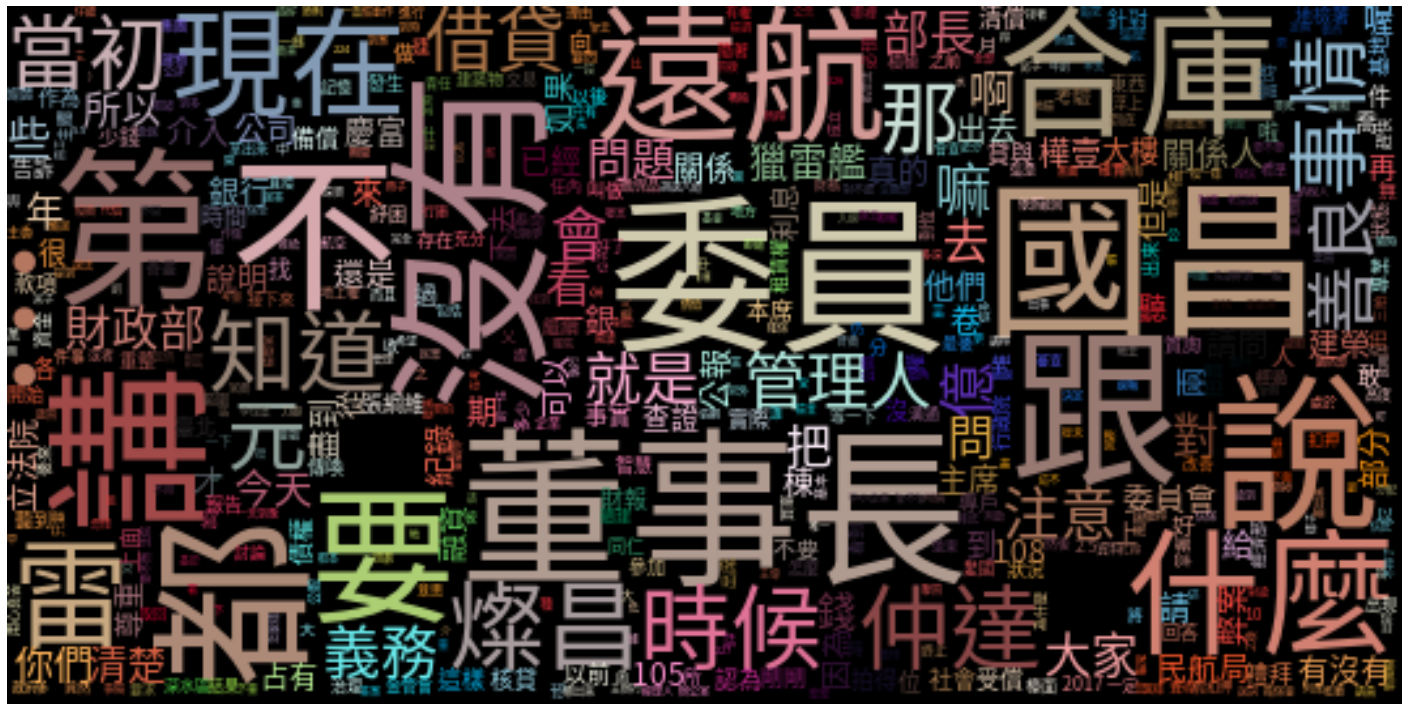

In [1]:
# 參考連結：
# https://github.com/amueller/word_cloud
# https://raw.githubusercontent.com/amueller/word_cloud/master/examples/parrot-by-jose-mari-gimenez2.jpg
# http://amueller.github.io/word_cloud/


import jieba
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
from scipy.ndimage import gaussian_gradient_magnitude



text = open ('txt/GOVtalk.txt',"r",encoding="utf-8").read()

jieba.set_dictionary('dict.txt.big.txt')
with open('stopword.txt','r',encoding="utf-8") as f:
    stops = f.read().split('\n')
    
terms = []
for sentence in jieba.cut(text):
    if sentence not in stops:
        terms.append(sentence)
        
#     print('/'.join(sentence))

dicition = Counter(terms)

# print(type(dicition))
# print(Counter(terms))
font = 'SourceHanSansTW-Regular.otf'



icon = "color"
icon_path = "%s.png" % icon


mask_color = np.array(Image.open(icon_path))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255


edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
mask_image[edges > .08] = 255




# mask_color = np.array(Image.open("taiwan.jpg"))

# background_color="white",

# print(type(WordCloud))





wordcloud = WordCloud(
                      max_words=2000,
                      mask = mask_color,
                      font_path= font,
                      max_font_size=65,
                      margin=1,
                      relative_scaling=0)





wordcloud.generate_from_frequencies(frequencies = dicition )


image_colors = ImageColorGenerator(mask_color)
wordcloud.recolor(color_func=image_colors)





plt.figure(figsize=(25,25),facecolor='w')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# print(text)

# plt.savefig("Wordcloud.png")
wordcloud.to_file("img/01.png")



